# Q.1: Import data and check null values, column info, and descriptive statistics of the data.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest


In [17]:
# Load the dataset
data = pd.read_csv('userbehaviour.csv')

In [18]:
data

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed
...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865,Installed
995,1996,43.0,61.0,0,6,8,1327,Installed
996,1997,47.0,761.0,0,6,1,1936,Installed
997,1998,6.0,73.0,1,5,1,3436,Installed


In [19]:
# Check for null values
print(data.isnull().sum())

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64


In [20]:
# Encode the 'Status' column
data['Status'] = data['Status'].map({'Installed': 1, 'Uninstalled': 0})


In [21]:
# Column information and descriptive statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None
            userid  Average Screen Time  Average Spent on App (INR)  \
count   999.000000           999.000000                  999.000000   
mean   1500.000000            24.390390                  424.415415   
std     288.530761            14.235415                  

# Q.2: Check the highest, lowest, and average screen time of all the users.

In [22]:
# Highest, lowest, and average screen time
highest_screen_time = data['Average Screen Time'].max()
lowest_screen_time = data['Average Screen Time'].min()
average_screen_time = data['Average Screen Time'].mean()

print(f'Highest Screen Time: {highest_screen_time}')
print(f'Lowest Screen Time: {lowest_screen_time}')
print(f'Average Screen Time: {average_screen_time}')


Highest Screen Time: 50.0
Lowest Screen Time: 0.0
Average Screen Time: 24.39039039039039


# Q.3: Check the highest, lowest, and the average amount spent by all the users.

In [23]:
# Highest, lowest, and average amount spent
highest_spent = data['Average Spent on App (INR)'].max()
lowest_spent = data['Average Spent on App (INR)'].min()
average_spent = data['Average Spent on App (INR)'].mean()

print(f'Highest Amount Spent: {highest_spent}')
print(f'Lowest Amount Spent: {lowest_spent}')
print(f'Average Amount Spent: {average_spent}')


Highest Amount Spent: 998.0
Lowest Amount Spent: 0.0
Average Amount Spent: 424.4154154154154


Q.4: Now check the relationship between the spending capacity and screen time of the active users
and the users who have uninstalled the app. Also explain your observation.
ANS: There seems to be a positive relationship between screen time and spending capacity for both active and uninstalled users. Users who spend more time on the app tend to spend more money.

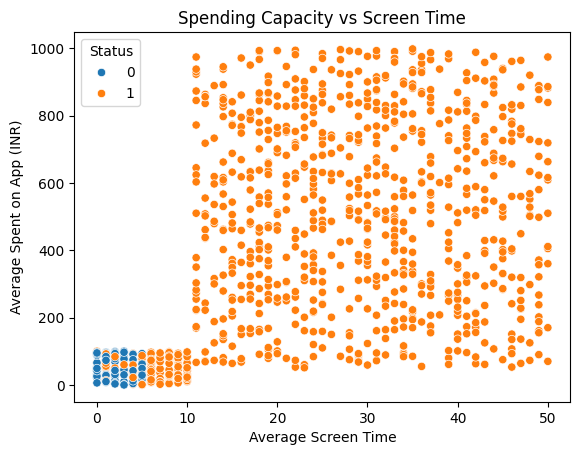

In [24]:
# Relationship between spending capacity and screen time
sns.scatterplot(data=data, x='Average Screen Time', y='Average Spent on App (INR)', hue='Status')
plt.title('Spending Capacity vs Screen Time')
plt.show()

Q.5: Now check the relationship between the ratings given by users and the average screen time.Also explain your observation.
ANS: By understanding this relationship, app developers and marketers can prioritize improving the features and aspects of the app that contribute to higher user satisfaction. Enhancing user experience can lead to increased screen time, higher ratings, and better overall retention. Focused efforts on addressing issues faced by less satisfied users can convert them into more engaged and happier users, benefiting both the users and the app's success.

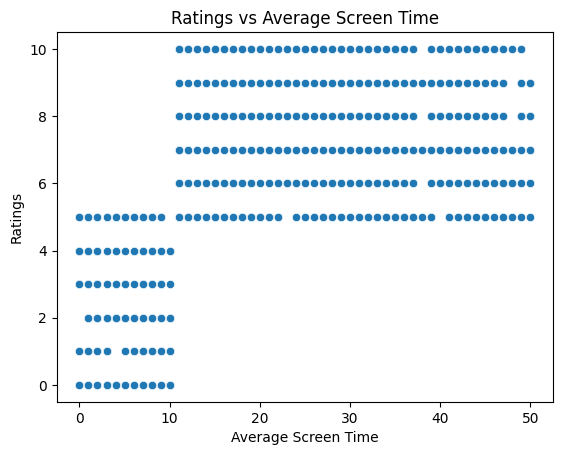

In [36]:
# Relationship between ratings and average screen time
sns.scatterplot(data=data, x='Average Screen Time', y='Ratings')
plt.title('Ratings vs Average Screen Time')
plt.show()

Q.6: Now move forward to App User segmentation to find the users that the app retained and
lost forever. You can use the K-means clustering algorithm in Machine Learning for this task.
Also, tell the number of segments you have got.


In [26]:
# Prepare data for clustering
features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']]

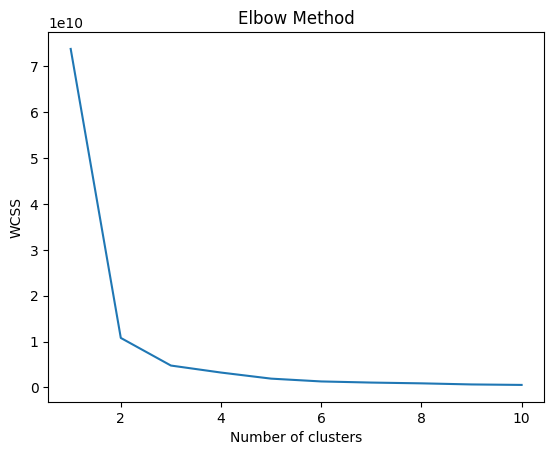

In [35]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Q.8: Explain the summary of your working.

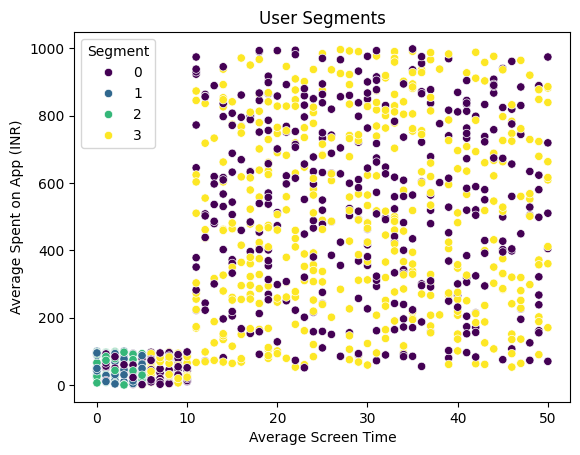

In [28]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming 4 clusters
data['Segment'] = kmeans.fit_predict(features)

# Visualize the segments
sns.scatterplot(data=data, x='Average Screen Time', y='Average Spent on App (INR)', hue='Segment', palette='viridis')
plt.title('User Segments')
plt.show()

Q.6: Now check the correlation between different metrics. Also explain your observation from
the correlation matrix

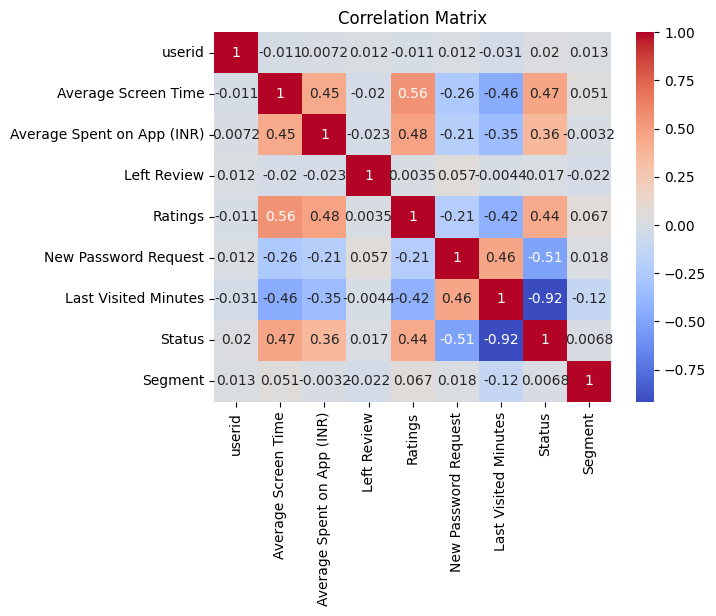

In [29]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Q.7: Now, detect anomalies in search queries. You can use various techniques for anomaly
detection. A simple and effective method is the Isolation Forest algorithm, which works well with
different data distributions and is efficient with large datasets.

In [33]:
# Prepare data for anomaly detection
anomaly_features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']]

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(anomaly_features)

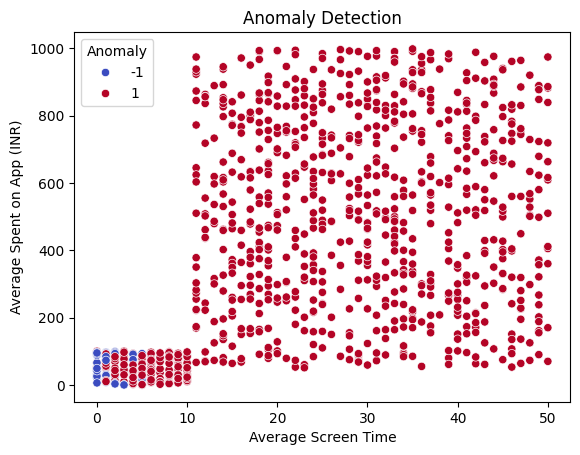

In [34]:
# Visualize anomalies
sns.scatterplot(data=data, x='Average Screen Time', y='Average Spent on App (INR)', hue='Anomaly', palette='coolwarm')
plt.title('Anomaly Detection')
plt.show()